# Bike Sharing Case Study
<br>

**Business Objective** :
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US based company named BoomBikes had a recent lost due to lockdown during Corono Virus spread.
<br><br>

**Business Problem** : A US based company named BoomBikes had a recent lost due to lockdown during Corono Virus spread. Due to difficult situation in market and competition from other companies, the company is finding it difficult to sustain.<br>
So company wants to understand the demand of share bikes and factors which influences it. The company wants to know 
   * Which variables are significant in predicting the demand for shared bikes.
   * How well those variables describe the bike demands


<br>**Data** :

| Column     | Description                                                                                                                                                                                                                                                                          |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| instant    | record index                                                                                                                                                                                                                                                                         |
| dteday     | date                                                                                                                                                                                                                                                                                 |
| season     | season (1:spring, 2:summer, 3:fall, 4:winter)                                                                                                                                                                                                                                        |
| yr         | year  (0: 2018, 1:2019)                                                                                                                                                                                                                                                              |
| mnth       | month ( 1 to 12)                                                                                                                                                                                                                                                                     |
| holiday    | whether is holiday or not                                                                                                                                                                                                                                                            |
| weekday    | day of the week                                                                                                                                                                                                                                                                      |
| workingday | if day is neither weekend nor holiday is 1, otherwise is 0                                                                                                                                                                                                                           |
| waethersit | 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp       | temperature in Celsius                                                                                                                                                                                                                                                               |
| atemp      | feeling temperature in Celsius                                                                                                                                                                                                                                                       |
| hum        | humdity                                                                                                                                                                                                                                                                              |
| windspreed | wind speed                                                                                                                                                                                                                                                                           |
| casual     | count of casual users                                                                                                                                                                                                                                                                |
| registered | count of registered users                                                                                                                                                                                                                                                            |
| cnt        | count of total rental bikes including both casual and registered                                                                                                                                                                                                                     |

<br>

**Defining High Level Steps**:
* Data Understanding and Cleanup
* EDA
* Data Preparation
* Build the Model
* Residual Analysis
* Model Prediction and Evaluation on Test Set

In [69]:
# import related libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sweetviz as sv

## Step1: Data Understanding and Cleanup ##

In [2]:
# read file
df_day = pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# shape of file
df_day.shape

(730, 16)

In [4]:
# file info
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Notes:
* _Non of the column have null values_

In [5]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
## drop complete duplicate records
df_day = df_day[~df_day.duplicated(keep='first')]
df_day.shape

(730, 16)

Notes:
* _As shape remains same so duplicates are present in data_

In [7]:
# Assign values to categorical columns except for yes/no cols
dict_season = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
dict_mnth = {1:'jan',2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul',8:'aug', 9:'sep',10:'oct', 11:'nov', 12:'dec'}
dict_weathersit = {1:'clear', 2:'mist_cloudy', 3:'light_snow', 4: 'heavy_rain'}
dict_weekday = {0:'sun', 1:'mon',2:'tues', 3:'wed', 4: 'thurs', 5:'fri', 6:'sat'}
df_day.season = df_day.season.map(dict_season)
df_day.mnth = df_day.mnth.map(dict_mnth)
df_day.weekday = df_day.weekday.map(dict_weekday)
df_day.weathersit = df_day.weathersit.map(dict_weathersit)

In [8]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tues,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# drop columns that do not look useful
## instant - seq number , can't be used
## dteday - already month and yr columns are available in data
## casual - as cnt = casual + registered. It is correlated and can be dropped
## registered - as cnt = casual + registered. It is correlated and can be dropped
drop_col_list = ['instant','dteday','casual','registered']
df_day.drop(drop_col_list,axis =1, inplace=True)
display(df_day.head())
print(df_day.shape)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


(730, 12)


In [10]:
# check if columns are aligned to correct types now after conversion
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## Step2: EDA

### Auto EDA using sweetviz

In [11]:
rpt_auto_eda = sv.analyze(df_day)
rpt_auto_eda.show_html('bike_sharing_auto_eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report bike_sharing_auto_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Notes:
* _In numerical variables, Temp seems to have a higher effect to demand_
* _In categorical variables mnth, season, yr seems to have higher effect to demand_

### Visualizing numerical variables

In [12]:
num_col_list = ['temp', 'atemp', 'hum','windspeed', 'cnt']
df_day_num = df_day[num_col_list]
display(df_day_num.head())
print(df_day_num.shape)

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


(730, 5)


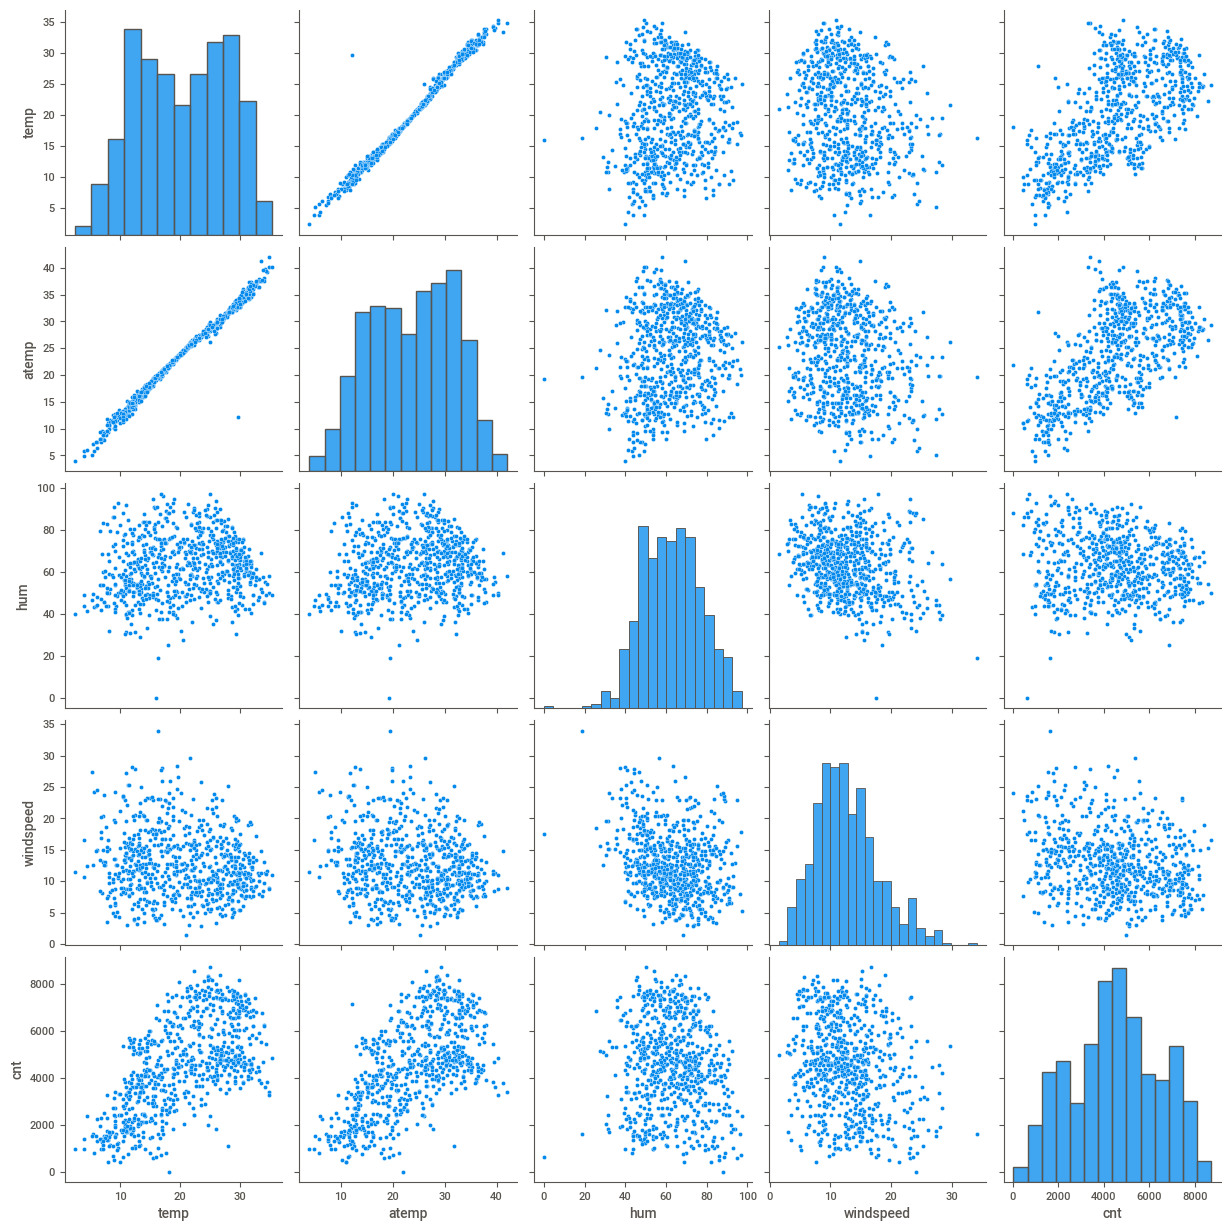

In [13]:
#distributions
sns.pairplot(df_day_num)
plt.show()

Notes:
* _From graph above it looks temp and atemp show more linear behaviour with cnt_

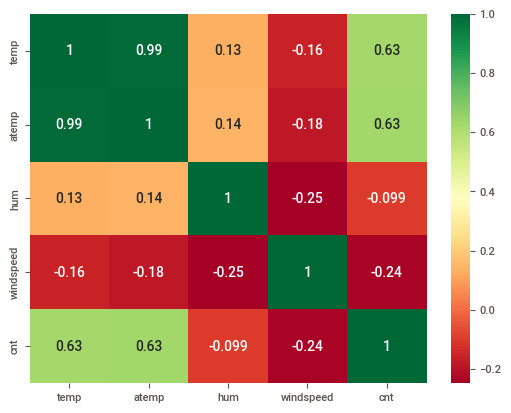

In [14]:
#correlations
sns.heatmap(df_day_num.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

Notes:
* _temp and atemp have high correlation with cnt_
* _temp and atemp is highly correlated to each other (0.99 correlation). So in this case we can drop atemp and keep temp_

In [15]:
#dropping atemp col based on above observation
df_day.drop('atemp', axis = 1, inplace=True)
display(df_day.head())
print(df_day.shape)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


(730, 11)


### Visualizing Categorical Variables

In [16]:
cat_col_list = ['season', 'mnth','holiday', 'weekday', 'workingday','weathersit','yr','cnt'] # includes target variable cnt
df_day_cat = df_day[cat_col_list]
display(df_day_cat.head())
print(df_day_cat.shape)

,season,mnth,holiday,weekday,workingday,weathersit,yr,cnt
0,spring,jan,0,sat,0,mist_cloudy,0,985
1,spring,jan,0,sun,0,mist_cloudy,0,801
2,spring,jan,0,mon,1,clear,0,1349
3,spring,jan,0,tues,1,clear,0,1562
4,spring,jan,0,wed,1,clear,0,1600


(730, 8)


In [17]:
def bx_plt(df, y):
    col_list = list(df.columns)
    num_plt = (len(col_list) - 1)//2
    y_var = y
    x_fig_size = 12
    y_fig_size = 7*num_plt/2
    i=1
    plt.figure(figsize=(x_fig_size, y_fig_size))
    for cat in col_list[:-2]:
        plt.subplot(num_plt,2,i)
        sns.boxplot(x = cat, y = y_var, data = df)
        i+=1
    plt.show()
        

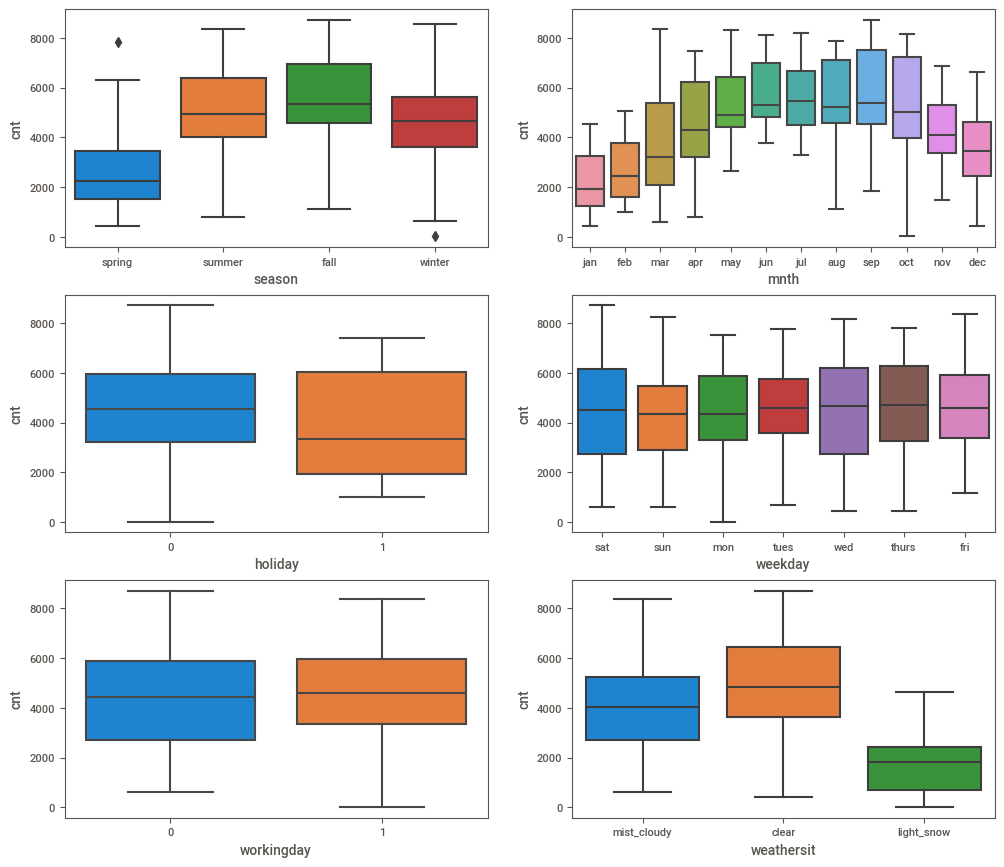

In [18]:
#boxplots
bx_plt(df_day_cat,'cnt')

Notes:
* _holiday, weekday and workingday doesnot seem to have much impact on Demand_
* _Season have impact on Demand. Fall season have high Demand and Spring season have low Demand_
* _weathersit have impact on Demand. Clear weather have more demand and ligh_snow have low Demand_
* _Demand seems to increase during start of the year and is highest during the mid of year and starts falling towards the end of year_

## Step3: Data Preparation

### Endoding and Dummy Variables

In [19]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


In [20]:
#yes/no variables - as already encoded to 0 and 1 so no need to modify them

# creating dummy variables
dummy_col_list = ['season', 'mnth', 'weekday', 'weathersit']
df_dummies = pd.get_dummies(df_day[dummy_col_list], drop_first=True)

In [21]:
display(df_dummies.head())
print(df_dummies.shape)

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_light_snow,weathersit_mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


(730, 22)


In [22]:
#merge dummies to original df
df_day = pd.concat([df_day, df_dummies], axis = 1)

In [23]:
#drop merged categorical columns
df_day.drop(dummy_col_list, axis=1, inplace=True)

In [24]:
display(df_day.head())
print(df_day.shape)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_light_snow,weathersit_mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


(730, 29)


### Split and Re-Scale Data

In [25]:
# split the data
df_train, df_test = train_test_split(df_day, train_size = 0.7, random_state = 100)

In [26]:
print(df_day.shape)
print(df_train.shape)
print(df_test.shape)

(730, 29)
(510, 29)
(220, 29)


In [27]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_light_snow,weathersit_mist_cloudy
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_light_snow,weathersit_mist_cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
# scaling train data using Min Max Scaler
scaler = MinMaxScaler()
scale_col_list = ['temp','hum','windspeed', 'cnt']
display(df_train[scale_col_list].head())
df_train[scale_col_list] = scaler.fit_transform(df_train[scale_col_list])
display(df_train[scale_col_list].head())
print(df_train[scale_col_list].describe())

,temp,hum,windspeed,cnt
576,29.246653,70.4167,11.083475,7216
426,16.980847,62.1250,10.792293,4066
728,10.489153,48.3333,23.500518,1796
482,15.443347,48.9583,8.708325,4220
111,13.803347,72.9583,14.707907,1683


,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


             temp         hum   windspeed         cnt
count  510.000000  510.000000  510.000000  510.000000
mean     0.537440    0.650480    0.320883    0.513499
std      0.225858    0.145846    0.169803    0.224421
min      0.000000    0.000000    0.000000    0.000000
25%      0.339853    0.538643    0.199179    0.356420
50%      0.542596    0.653714    0.296763    0.518638
75%      0.735215    0.754830    0.414447    0.684710
max      1.000000    1.000000    1.000000    1.000000


## Step4: Build the Model

* p-values for feature to be less than 0.05 will be considered
* VIF less than 5 will be considered


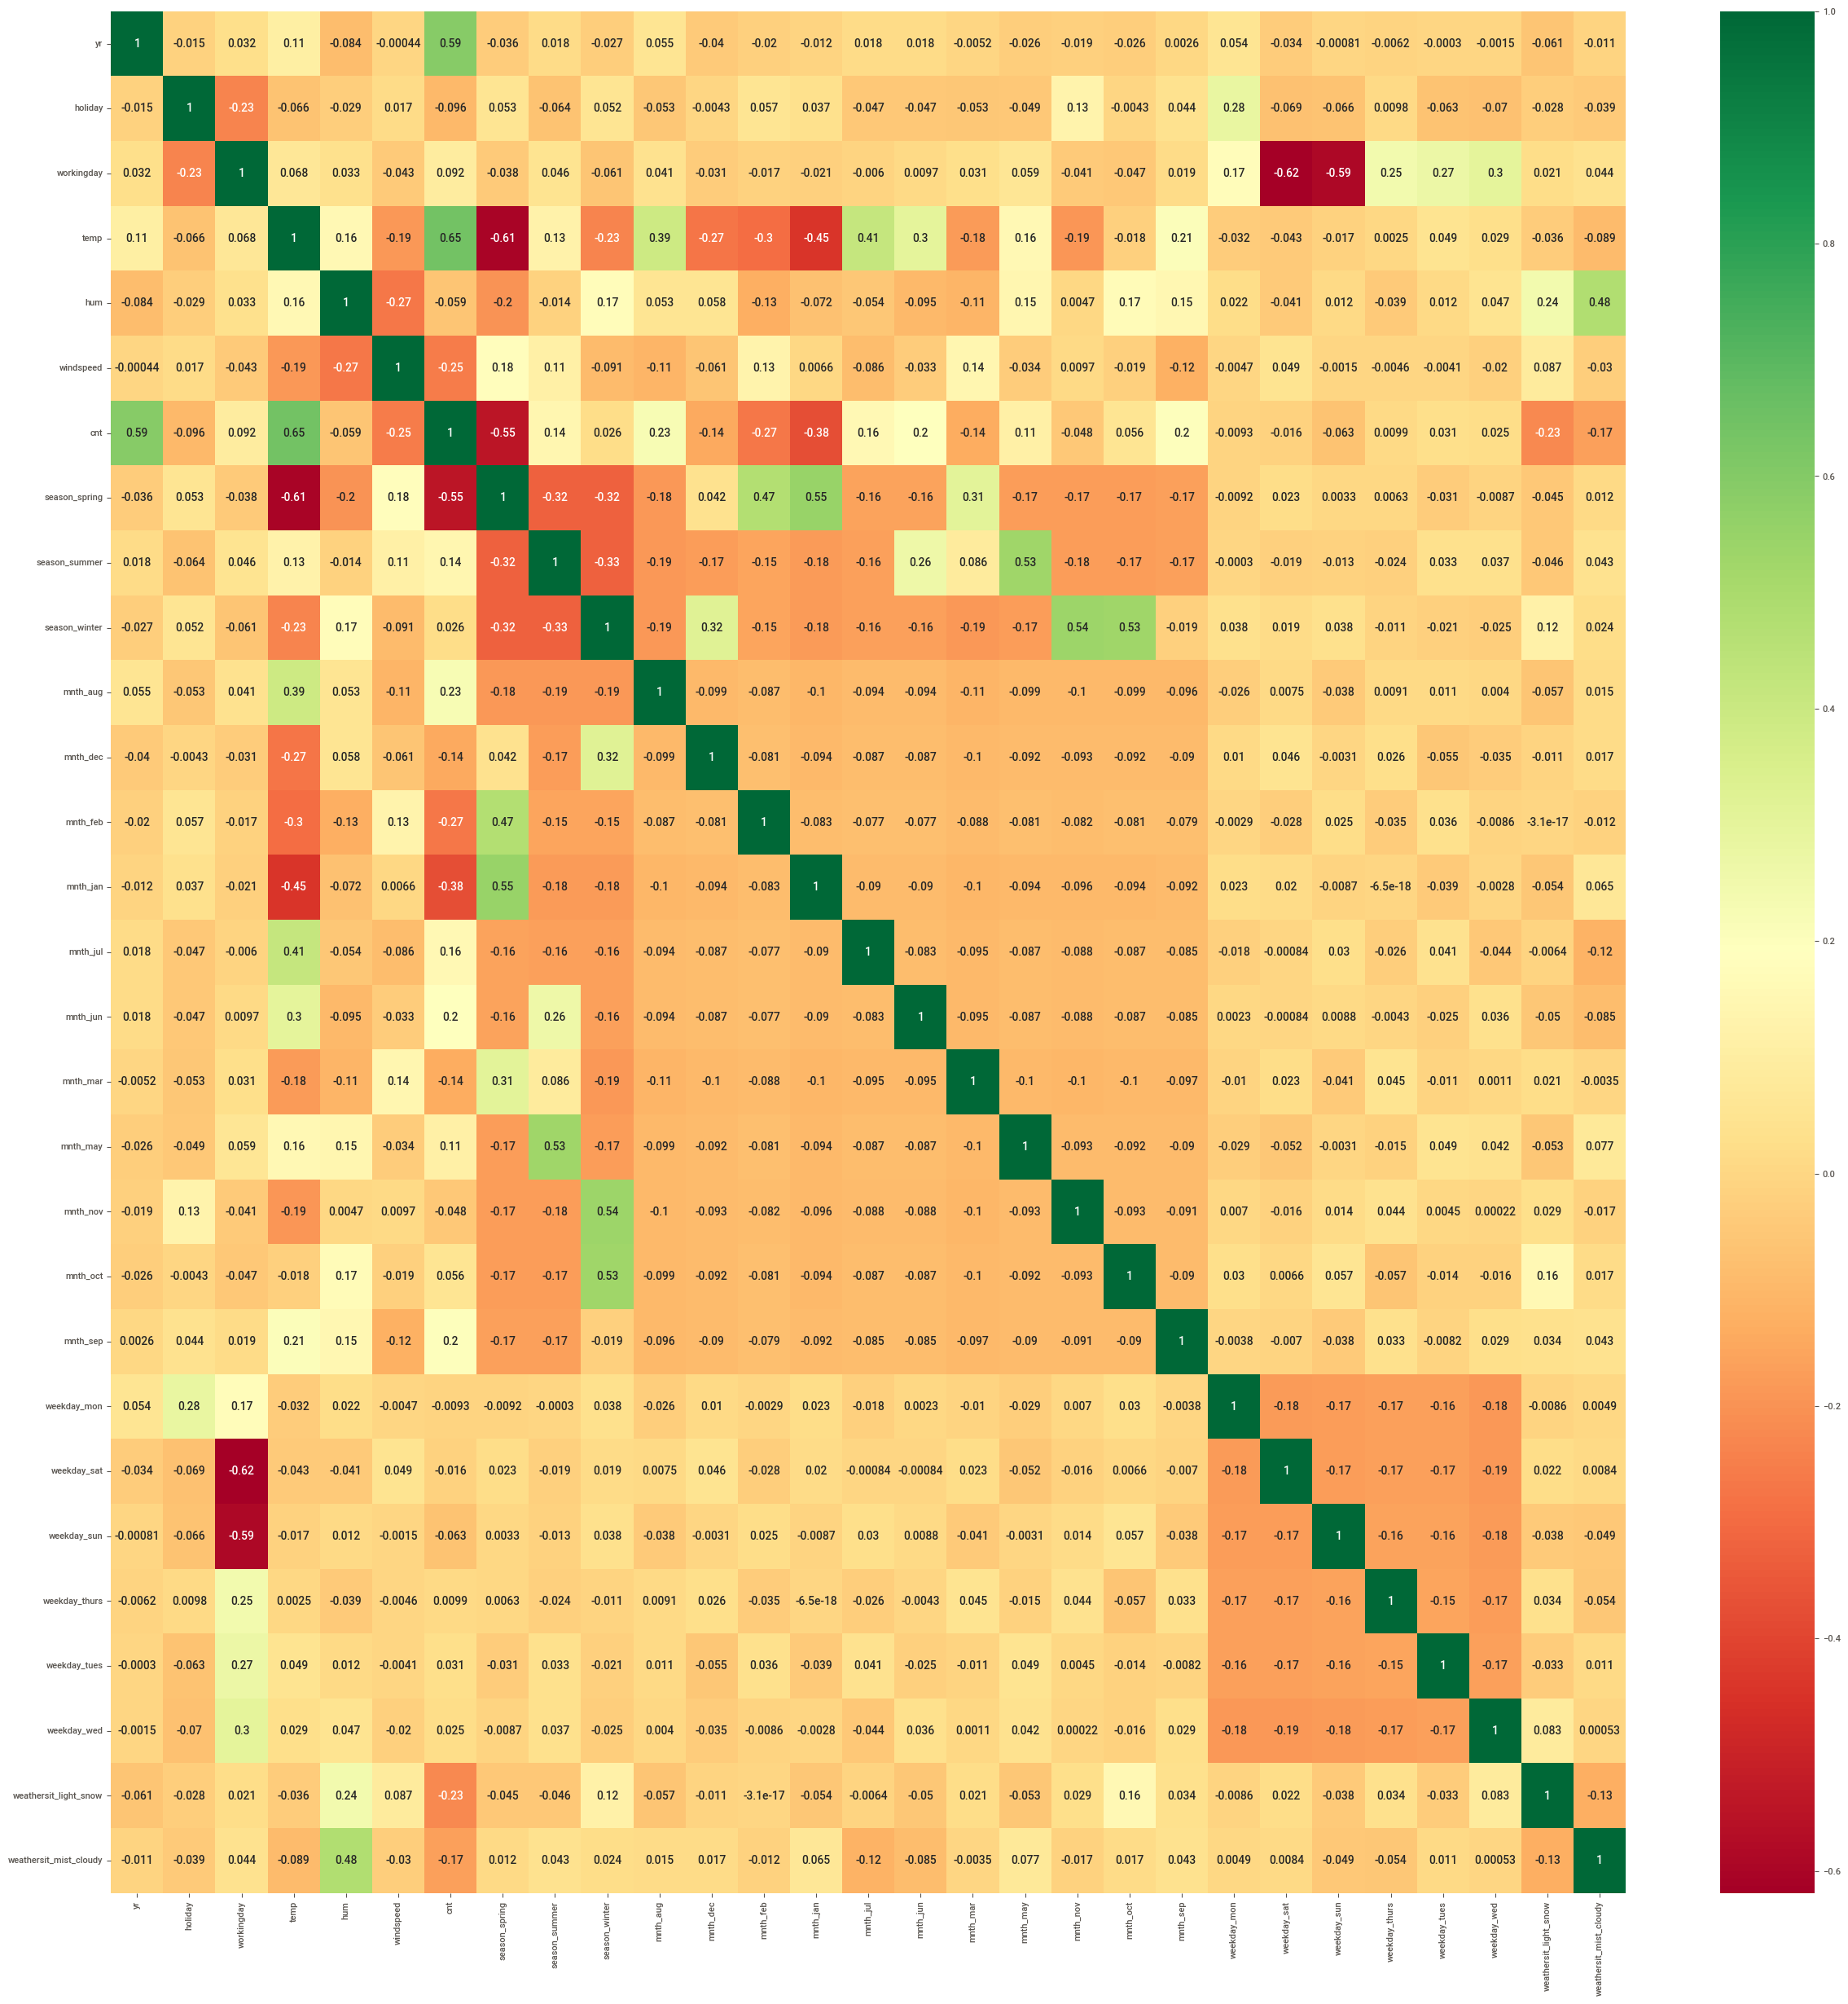

In [30]:
# visualize the correlation on train set
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
#create function to calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model1

This model will use RFE to select top 15 variables and then statsmodel to perform analysis

In [33]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe1 = RFE(lm1, n_features_to_select = 15)
rfe1 = rfe1.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thurs', False, 10),
 ('weekday_tues', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist_cloudy', True, 1)]

In [35]:
cols_model1 = X_train.columns[rfe1.support_]
cols_not_in_model1 = X_train.columns[~rfe1.support_]

In [36]:
#use statsmodel to analyse
X_train_sm1 = X_train[cols_model1]
## add constant
X_train_sm1 = sm.add_constant(X_train_sm1)

In [37]:
#model 1 using statsmodels
lr1 = sm.OLS(y_train, X_train_sm1)
lr1_model = lr1.fit()
# summary
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        20:55:33   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2519      0.036      6.969      0.000       0.181       0.323
yr                         0.2305      0.008     28.795      0.000       0.215       0.246
holiday                   -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                 0.0433      0.012      3.762      0.000       0.021       0.066
temp                       0.5096      0.034     14.837      0.000       0.442       0.577
hum                       -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                 -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer              0.0508      0.015      3.423      0.001       0.022       0.080
season_winter              0.0933      0.017      5.403      0.000       0.059       0.127
mnth_jan                  -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_jul                  -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_sep                   0.0814      0.016      4.945      0.000       0.049       0.114
weekday_sat                0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_light_snow     -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_mist_cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#VIF
calculateVIF(X_train[cols_model1])

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_mist_cloudy,2.29
0,yr,2.09
12,weekday_sat,1.98


Note:
* _Adjusted R-square is 0.844_
* _p-value is okay but VIP > 5 for some of the Features. So still need to drop more features_

### Model2

This model will use RFE to select top 10 variables and then statsmodel to perform analysis

In [39]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

rfe2 = RFE(lm2, n_features_to_select = 10)
rfe2 = rfe2.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thurs', False, 10),
 ('weekday_tues', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist_cloudy', True, 1)]

In [41]:
cols_model2 = X_train.columns[rfe2.support_]
cols_not_in_model2 = X_train.columns[~rfe2.support_]

In [42]:
#use statsmodel to analyse
X_train_sm2 = X_train[cols_model2]
## add constant
X_train_sm2 = sm.add_constant(X_train_sm2)

In [43]:
#model 2 using statsmodels
lr2 = sm.OLS(y_train, X_train_sm2)
lr2_model = lr2.fit()
# summary
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.79e-186
Time:                        20:55:33   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2682      0.026     10.292      0.000       0.217       0.319
yr                        0.2259      0.008     27.118      0.000       0.210       0.242
holiday                  -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp                      0.6200      0.023     27.492      0.000       0.576       0.664
hum                      -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed                -0.2059      0.026     -7.889      0.000      -0.257      -0.155
season_summer             0.0800      0.011      7.281      0.000       0.058       0.102
season_winter             0.1390      0.011     12.903      0.000       0.118       0.160
mnth_jul                 -0.0482      0.018     -2.606      0.009      -0.085      -0.012
mnth_sep                  0.0944      0.016      5.724      0.000       0.062       0.127
weathersit_light_snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#VIF
calculateVIF(X_train[cols_model2])

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,season_summer,1.76
6,season_winter,1.68
7,mnth_jul,1.55
8,mnth_sep,1.29
9,weathersit_light_snow,1.09
1,holiday,1.04


Notes:
* _p-value of all features are nearly 0 but VIF for hum and temp is > 5. Still need to drop hum and analyse_

### Model3
In this Model, hum will be dropped from list of top 10 variables we got in Model2. Statsmodels will be used to analyse the model

In [45]:
cols_model3 = cols_model2
cols_model3 = list(cols_model3)
cols_model3.remove('hum')
cols_model3

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_jul',
 'mnth_sep',
 'weathersit_light_snow']

In [46]:
X_train_sm3 = X_train[cols_model3]

In [47]:
#add constant
X_train_sm3 = sm.add_constant(X_train_sm3)

In [48]:
#model 3 using statsmodels
lr3 = sm.OLS(y_train, X_train_sm3)
lr3_model = lr3.fit()
# summary
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          4.42e-171
Time:                        20:55:33   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0840      0.018      4.794      0.000       0.050       0.118
yr                        0.2329      0.009     26.061      0.000       0.215       0.251
holiday                  -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                      0.5854      0.024     24.438      0.000       0.538       0.632
windspeed                -0.1459      0.027     -5.365      0.000      -0.199      -0.092
season_summer             0.0750      0.012      6.346      0.000       0.052       0.098
season_winter             0.1228      0.011     10.731      0.000       0.100       0.145
mnth_jul                 -0.0313      0.020     -1.578      0.115      -0.070       0.008
mnth_sep                  0.0822      0.018      4.640      0.000       0.047       0.117
weathersit_light_snow    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#VIF
calculateVIF(X_train[cols_model3])

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,season_summer,1.75
6,mnth_jul,1.51
5,season_winter,1.43
7,mnth_sep,1.28
8,weathersit_light_snow,1.06
1,holiday,1.03


Notes:
* _p-value of mnth_jul is 0.115 which is greater than 0.05. Lets drops it for see the impact in next model_

### Model4
In this Model, mnth_jul will be dropped from list of features we got in Model3. Statsmodels will be used to analyse the model

In [50]:
cols_model4 = cols_model3
cols_model4.remove('mnth_jul')
cols_model4

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_sep',
 'weathersit_light_snow']

In [51]:
X_train_sm4 = X_train[cols_model4]

In [52]:
#add constant
X_train_sm4 = sm.add_constant(X_train_sm4)

In [53]:
#model 4 using statsmodels
lr4 = sm.OLS(y_train, X_train_sm4)
lr4_model = lr4.fit()
#summary
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          9.22e-172
Time:                        20:55:34   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0875      0.017      5.029      0.000       0.053       0.122
yr                        0.2334      0.009     26.093      0.000       0.216       0.251
holiday                  -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp                      0.5682      0.021     26.580      0.000       0.526       0.610
windspeed                -0.1455      0.027     -5.340      0.000      -0.199      -0.092
season_summer             0.0812      0.011      7.256      0.000       0.059       0.103
season_winter             0.1261      0.011     11.179      0.000       0.104       0.148
mnth_sep                  0.0895      0.017      5.229      0.000       0.056       0.123
weathersit_light_snow    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#VIF
calculateVIF(X_train[cols_model4])

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_summer,1.55
5,season_winter,1.34
6,mnth_sep,1.20
7,weathersit_light_snow,1.06
1,holiday,1.03


Notes:
* _Adjusted R-square is 0.801_
* _p-value of all the features is less than 0.05 and VIF is also less than 5._
* _This seems to be a good model comprising of 8 features_

In [55]:
#create final variables. Model4 is used
cols_list_fin = cols_model4
X_train_fin = X_train_sm4
lr_model_fin = lr4_model

In [56]:
lr_model_fin.params

const                    0.087528
yr                       0.233434
holiday                 -0.086667
temp                     0.568212
windspeed               -0.145477
season_summer            0.081150
season_winter            0.126067
mnth_sep                 0.089499
weathersit_light_snow   -0.253491
dtype: float64

Notes:
* _Linear Equation after final model_<br>
    **y = 0.087 + 0.233 * yr - 0.086 * holiday + 0.568 * temp - 0.145 * windspeed + 0.081 * season_summer + 0.126 * season_winter + 0.089 * mnth_sep - 0.253 * weathersit_light_snow**

## Step5: Residual Analysis

In [57]:
# predicting y values on training set
y_train_pred = lr_model_fin.predict(X_train_fin)

In [58]:
#residual
res = y_train - y_train_pred

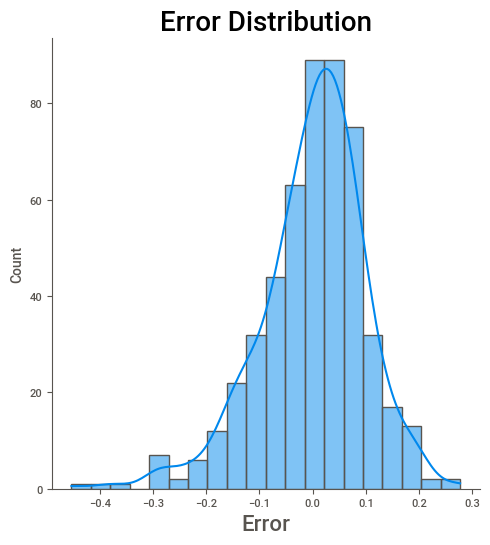

In [59]:
#plotting res
sns.displot(res, kde=True, bins=20)
plt.title('Error Distribution', fontsize=20)
plt.xlabel('Error', fontsize = 16)
plt.show()

Notes:
* _Error is normally distributed_
* _Error has a mean of 0_
* _The Residual analysis is satisfying the assumptions_

## Step6: Model Prediction and Evaluation on Test Set

In [60]:
#scale test data
display(df_test[scale_col_list].head())
df_test[scale_col_list] = scaler.transform(df_test[scale_col_list])
display(df_test[scale_col_list].head())
print(df_test[scale_col_list].describe())

,temp,hum,windspeed,cnt
184,29.793347,63.7917,5.459106,6043
535,32.082500,59.2083,7.625404,6211
299,19.270000,81.2917,13.250121,2659
221,31.433347,42.4167,13.417286,4780
152,29.315000,30.5000,19.583229,4968


,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


             temp         hum   windspeed         cnt
count  220.000000  220.000000  220.000000  220.000000
mean     0.558718    0.638221    0.313293    0.522154
std      0.233187    0.148694    0.159584    0.219163
min      0.046591    0.261915   -0.042808    0.048205
25%      0.355429    0.529197    0.198843    0.378595
50%      0.558172    0.625590    0.300126    0.524678
75%      0.755981    0.743798    0.402718    0.677750
max      0.984424    1.002146    0.807474    0.963300


In [61]:
#create X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
X_test = X_test[cols_list_fin]
# add constant to X_test
X_test = sm.add_constant(X_test)
display(X_test.head())
print(X_test.shape)

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_sep,weathersit_light_snow
184,1.0,0,1,0.831783,0.084219,0,0,0,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0


(220, 9)


In [63]:
y_test_pred = lr_model_fin.predict(X_test)

In [64]:
# evaluate the model
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7720731949554799

In [65]:
n= X_test.shape[0] #number of records
p= X_test.shape[1] #number of features
score = r2
adjr= 1-(1-score)*(n-1)/(n-p-1)
print(adjr)

0.7623049033107148


Notes:
* _R-squared for Training Set = 0.804_<br>
* _Adjusted R-squared for Training Set = 0.801_<br>
* _R-squared for Test Set = 0.772_<br>
* _Adjusted R-squared for Test Set = 0.762_<br>

In [66]:
cols_list_fin

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_sep',
 'weathersit_light_snow']

**Final list of features**<br> 
* yr
* holiday
* temp
* windspeed
* season_summer
* season_winter
* mnth_sep
* weathersit_light_snow

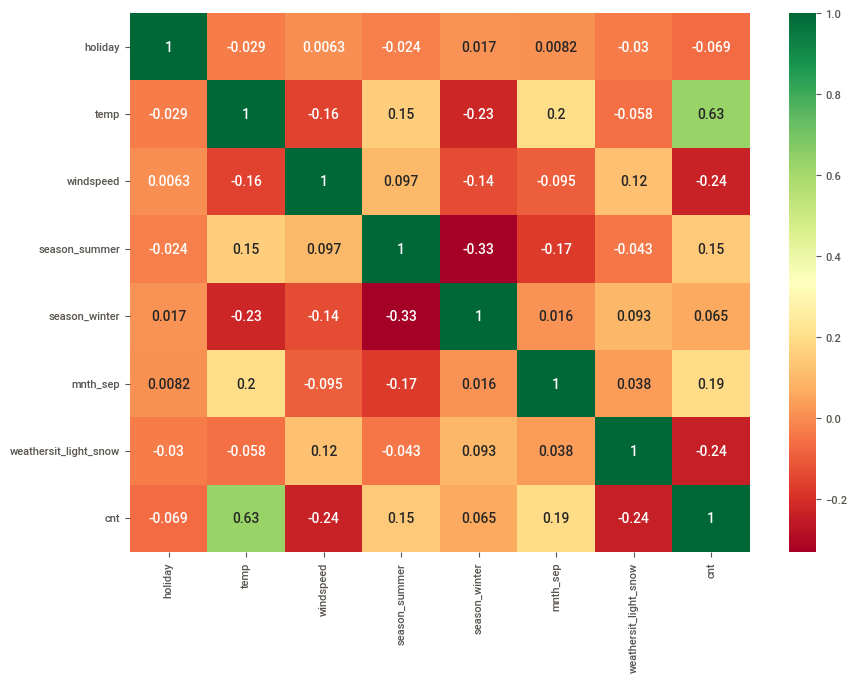

In [68]:
#Correlation of Final Selected Features and cnt
plt.figure(figsize = (10, 7))
df_fin_pred = df_day[['holiday','temp','windspeed','season_summer','season_winter','mnth_sep','weathersit_light_snow', 'cnt']]
sns.heatmap(df_fin_pred.corr(), annot = True, cmap="RdYlGn")
plt.show()